# 2. Regularized Logistic Regression

## 2.1 Visualizing the data

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import optimize
from sympy import *
%matplotlib inline

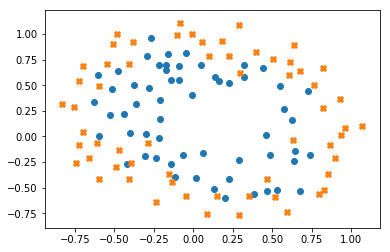

In [177]:
df = pd.read_csv("ex2data2.txt", header=None, names=["t1", "t2", "Accepted"])
accepted = df[df['Accepted'] == 1]
rejected = df[df['Accepted'] == 0]

plt.scatter(accepted.t1, accepted.t2, marker="o")
plt.scatter(rejected.t1, rejected.t2, marker="X")

### We can see that the function seperates the classes can't be decribed by linear line

## 2.2 Feature Mapping

In [178]:
df = pd.read_csv("ex2data2.txt", header=None, names=["t1", "t2", "Accepted"])
maxExponent = 7
for i in range(1, maxExponent):
    for j in range(0, i):
        colName = f"t1^{i-j}*t2^{j}"
        df.insert(len(df.columns)-1, colName, np.power(df.t1, i-j)*np.power(df.t2, j))
df.insert(0, "Ones", 1)
df.head()

,Ones,t1,t2,t1^1*t2^0,t1^2*t2^0,t1^1*t2^1,t1^3*t2^0,t1^2*t2^1,t1^1*t2^2,t1^4*t2^0,...,t1^3*t2^2,t1^2*t2^3,t1^1*t2^4,t1^6*t2^0,t1^5*t2^1,t1^4*t2^2,t1^3*t2^3,t1^2*t2^4,t1^1*t2^5,Accepted
0,1,0.051267,0.69956,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,...,0.000066,0.000900,0.012278,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,1
1,1,-0.092742,0.68494,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,...,-0.000374,0.002764,-0.020412,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,1
2,1,-0.213710,0.69225,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,...,-0.004677,0.015151,-0.049077,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,1
3,1,-0.375000,0.50219,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,...,-0.013299,0.017810,-0.023851,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,1
4,1,-0.513250,0.46564,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,...,-0.029315,0.026596,-0.024128,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,1


### 2.3 Cost and Gradient functions

In [179]:
def sigmoid(z):
    '''Compute sigmoid function for number/vector/matrix z'''
    return 1 / (1 + np.exp(-z))

In [180]:
def costFunctionReg(theta, X, y, gama):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    z = X * theta.transpose()
    sumArg = np.multiply(-y, np.log(sigmoid(z))) - np.multiply((1-y), np.log(1-sigmoid(z)))
    m = X.shape[0]
    return ((1 / float(m)) * np.sum(sumArg)) + (gama/(2*float(m))*np.sum(np.power(theta[:, 1:], 2)))

In [181]:
def gradientReg(theta, X, y, gama):
    m, n = X.shape
    gradientVector = np.array(np.zeros(n))
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    z = X * theta.transpose()
    regArg = float(gama)/m
    for j in range(n):
        sumArg = np.multiply(sigmoid(z) - y, X[:, j])
        regAddition = 0 if j==0 else regArg*theta[0, j] 
        gradientVector[j] = (np.sum(sumArg) * (1 / float(m))) + regAddition
    return gradientVector

In [182]:
X = np.matrix(df.as_matrix(columns=df.columns[:len(df.columns)-1]))
y = np.matrix(df.as_matrix(columns=df.columns[len(df.columns)-1:]))
theta = np.matrix(np.zeros(X.shape[1]))
gama = 0

print(costFunctionReg(theta, X, y, gama))

0.69314718056


### Optimizing Theta

In [183]:
def predictSingular(X, optimumTheta):
    X = np.matrix(X)
    optimumTheta = np.matrix(optimumTheta)
    prob = sigmoid(X * optimumTheta.transpose())
    return 1 if prob >= 0.5 else 0

In [184]:
optimumResult = optimize.minimize(fun=costFunctionReg, x0=theta, args=(X, y, gama), jac=gradientReg, method="TNC")
optimumTheta = optimumResult.x
display(optimumTheta)
prediction = np.array([predictSingular(x, optimumTheta) for x in X])
accuracy = float(np.sum(prediction == np.array(y).T)) / len(X)
print(accuracy)

array([   1.00340489,   -1.5385145 ,   -0.38410102,   -1.5385145 ,
         -4.10471523,   -7.24308608,   -3.62805756,   12.5000742 ,
         42.36713049,   62.62577717,   67.28685286,   59.31594681,
        -29.20177452,   40.76661444,   95.82759102,  185.68628529,
         76.25384442, -116.30628639, -132.95106888, -211.28029343,
       -331.37471732, -258.28785542, -211.86086221,  103.9778482 ])

0.8559322033898306


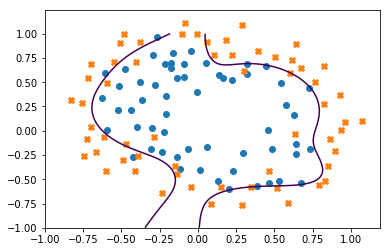

In [185]:
df = pd.read_csv("ex2data2.txt", header=None, names=["t1", "t2", "Accepted"])
accepted = df[df['Accepted'] == 1]
rejected = df[df['Accepted'] == 0]

plt.scatter(accepted.t1, accepted.t2, marker="o")
plt.scatter(rejected.t1, rejected.t2, marker="X")
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
X1, X2 = np.meshgrid(x1, x2)
F = 1*optimumTheta[0] + X1*optimumTheta[1] + X2*optimumTheta[2]
thetaIndex = 3
for i in range(1, maxExponent):
    for j in range(0, i):
        F += (optimumTheta[thetaIndex]*(np.power(X1, i-j)*np.power(X2, j)))
        thetaIndex += 1
plt.contour(X1,X2,F,[0])
plt.show()